In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import chardet
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [8]:
# Read in cleaned CSV
merged_data = pd.read_csv('Cleaned_Dataframes/Merged_Dataframes_cleaned.csv')
merged_data.head()

,State,Percentage of Uninsured Adults,Percentage of Adults visit Reg Doctors,Avoidable Deaths per 100k Population,Treatable Deaths per 100k Population,Preventable Deaths per 100k Population
0,Alabama,15.25,77.65,321.2,108.5,212.6
1,Alaska,15.60,65.55,261.7,67.9,193.9
2,Arizona,15.00,72.20,249.3,76.1,173.2
3,Arkansas,12.70,80.00,351.0,121.7,229.3
4,California,10.55,74.65,203.8,70.8,133.1


In [28]:
# Describe data per column
stat_summ_unis = merged_data["Percentage of Uninsured Adults"].describe()
stat_summ_doc = merged_data["Percentage of Adults visit Reg Doctors"].describe()
stat_summ_avoi = merged_data["Avoidable Deaths per 100k Population"].describe()
stat_summ_treat = merged_data["Treatable Deaths per 100k Population"].describe()
stat_summ_prev = merged_data["Preventable Deaths per 100k Population"].describe()

print('Summary Statistics')
print(stat_summ_unis)
print(stat_summ_doc)
print(stat_summ_avoi)
print(stat_summ_treat)
print(stat_summ_prev)

Summary Statistics
count    51.000000
mean     11.609804
std       4.407358
min       4.100000
25%       8.300000
50%      11.300000
75%      14.900000
max      24.200000
Name: Percentage of Uninsured Adults, dtype: float64
count    51.000000
mean     77.522549
std       5.502566
min      65.550000
25%      73.650000
50%      77.500000
75%      81.725000
max      87.250000
Name: Percentage of Adults visit Reg Doctors, dtype: float64
count     51.000000
mean     260.709804
std       51.413665
min      185.900000
25%      222.050000
50%      252.200000
75%      295.600000
max      385.600000
Name: Avoidable Deaths per 100k Population, dtype: float64
count     51.000000
mean      84.354902
std       18.685335
min       59.500000
25%       70.050000
50%       80.800000
75%       95.200000
max      137.500000
Name: Treatable Deaths per 100k Population, dtype: float64
count     51.000000
mean     176.349020
std       34.608296
min      126.400000
25%      151.900000
50%      173.200000
75%  

In [24]:
# Data variance
var_unis = merged_data["Percentage of Uninsured Adults"].var()
var_doc = merged_data["Percentage of Adults visit Reg Doctors"].var()
var_avoi = merged_data["Avoidable Deaths per 100k Population"].var()
var_treat = merged_data["Treatable Deaths per 100k Population"].var()
var_prev = merged_data["Preventable Deaths per 100k Population"].var()

print('Variance:')
print(f'% Uninsured Adults: {var_unis}')
print(f'% Adults with Primary Care Doc: {var_doc}')
print(f'Avoidable Deaths: {var_avoi}')
print(f'Treatable Deaths: {var_treat}')
print(f'Preventable Deaths: {var_prev}')

Variance:
% Uninsured Adults: 19.424801960784308
% Adults with Primary Care Doc: 30.27823137254904
Avoidable Deaths: 2643.3649019607838
Treatable Deaths: 349.1417254901961
Preventable Deaths: 1197.7341490196081


In [120]:
# # Standard Deviation
# # This is actually included in summary statistics
# std_unis = merged_data["Percentage of Uninsured Adults"].std()
# std_doc = merged_data["Percentage of Adults visit Reg Doctors"].std()
# std_avoi = merged_data["Avoidable Deaths per 100k Population"].std()
# std_treat = merged_data["Treatable Deaths per 100k Population"].std()
# std_prev = merged_data["Preventable Deaths per 100k Population"].std()

# print('Standard Deviation:')
# print(f'% Uninsured Adults: {std_unis}')
# print(f'% Adults Regular Doc Visits: {std_doc}')
# print(f'Avoidable Deaths: {std_avoi}')
# print(f'Treatable Deaths: {std_treat}')
# print(f'Preventable Deaths: {std_prev}')

In [97]:
# Sort the data set low to high based on desired column
# AFTER continuing on - I realize it might've been better to make these their own dataframes - not redoing it now
unis_sorted = merged_data.sort_values("Percentage of Uninsured Adults")
doc_sorted = merged_data.sort_values("Percentage of Adults visit Reg Doctors")
avoi_sorted = merged_data.sort_values("Avoidable Deaths per 100k Population")
treat_sorted = merged_data.sort_values("Treatable Deaths per 100k Population")
prev_sorted = merged_data.sort_values("Preventable Deaths per 100k Population")

In [98]:
# confirm sorting is low to high 
unis_sorted.head(10)

,State,Percentage of Uninsured Adults,Percentage of Adults visit Reg Doctors,Avoidable Deaths per 100k Population,Treatable Deaths per 100k Population,Preventable Deaths per 100k Population
21,Massachusetts,4.10,86.95,196.5,59.6,136.9
8,District of Columbia,4.20,77.25,321.7,109.2,212.4
11,Hawaii,5.75,84.20,209.6,79.4,130.2
39,Rhode Island,5.85,85.70,222.7,69.3,153.4
45,Vermont,6.10,85.75,223.9,62.2,161.6
23,Minnesota,6.10,75.25,185.9,59.5,126.4
15,Iowa,6.95,82.55,237.5,79.1,158.4
32,New York,7.50,79.65,205.3,76.2,129.1
38,Pennsylvania,7.70,84.30,252.2,82.5,169.7
49,Wisconsin,7.85,82.45,224.8,72.3,152.5


In [87]:
# DESIRED OUTCOMES
print('Top 5 States - Least uninsured - Best to Worst')
print(unis_sorted[["State","Percentage of Uninsured Adults"]].head())
print('--------------------------------------------------------------')
print('Top 5 States - Most Regular Primary Care Visits - Worst to Best')
print(doc_sorted[["State","Percentage of Adults visit Reg Doctors"]].tail())
print('--------------------------------------------------------------')
print('Top 5 States - Least Avoidable Deaths - Best to Worst')
print(avoi_sorted[["State","Avoidable Deaths per 100k Population"]].head())
print('--------------------------------------------------------------')
print('Top 5 States - Least Treatable Deaths - Best to Worst')
print(treat_sorted[["State","Treatable Deaths per 100k Population"]].head())
print('--------------------------------------------------------------')
print('Top 5 States - Least Preventable Deaths - Best to Worst')
print(prev_sorted[["State","Preventable Deaths per 100k Population"]].head())
print('--------------------------------------------------------------')

Top 5 States - Least uninsured - Best to Worst
                   State  Percentage of Uninsured Adults
21         Massachusetts                            4.10
8   District of Columbia                            4.20
11                Hawaii                            5.75
39          Rhode Island                            5.85
45               Vermont                            6.10
--------------------------------------------------------------
Top 5 States - Most Regular Primary Care Visits - Worst to Best
            State  Percentage of Adults visit Reg Doctors
19          Maine                                   85.35
39   Rhode Island                                   85.70
45        Vermont                                   85.75
21  Massachusetts                                   86.95
29  New Hampshire                                   87.25
--------------------------------------------------------------
Top 5 States - Least Avoidable Deaths - Best to Worst
            State  

In [91]:
# UNDESIRED OUTCOMES
print('Bottom 5 States - Most Uninsured - Best to Worst')
print(unis_sorted[["State","Percentage of Uninsured Adults"]].tail())
print('--------------------------------------------------------------')
print('Bottom 5 States - Least Regular Primary Care Visits - Worst to Best') 
print(doc_sorted[["State","Percentage of Adults visit Reg Doctors"]].head())
print('--------------------------------------------------------------')
print('Bottom 5 States - Most Avoidable Deaths - Best to Worst' )
print(avoi_sorted[["State","Avoidable Deaths per 100k Population"]].tail())
print('--------------------------------------------------------------')
print('Bottom 5 States - Most Treatable Deaths - Best to Worst')
print(treat_sorted[["State","Treatable Deaths per 100k Population"]].tail())
print('--------------------------------------------------------------')
print('Bottom 5 States - Most Preventable Deaths - Best to Worst')
print(prev_sorted[["State","Preventable Deaths per 100k Population"]].tail())
print('--------------------------------------------------------------')

Bottom 5 States - Most Uninsured - Best to Worst
          State  Percentage of Uninsured Adults
10      Georgia                           19.00
24  Mississippi                           19.05
9       Florida                           19.35
36     Oklahoma                           20.55
43        Texas                           24.20
--------------------------------------------------------------
Bottom 5 States - Least Regular Primary Care Visits - Worst to Best
         State  Percentage of Adults visit Reg Doctors
1       Alaska                                   65.55
50     Wyoming                                   67.45
28      Nevada                                   67.70
43       Texas                                   67.90
31  New Mexico                                   69.30
--------------------------------------------------------------
Bottom 5 States - Most Avoidable Deaths - Best to Worst
            State  Avoidable Deaths per 100k Population
17       Kentucky          

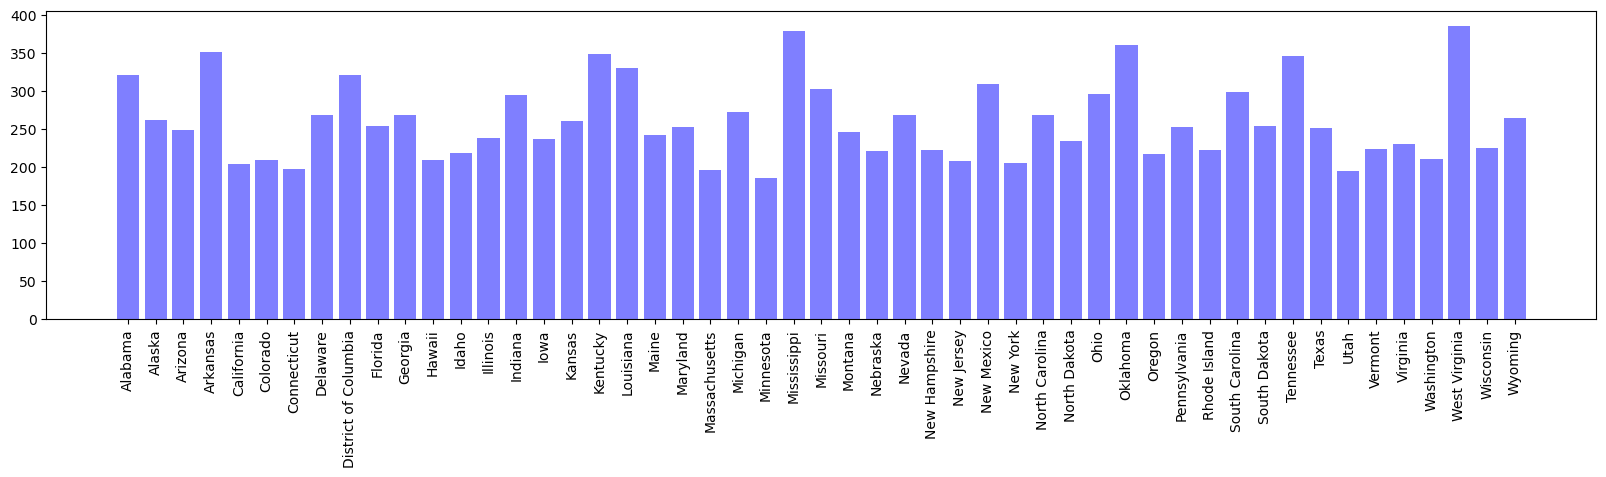

In [30]:
# Bar chart - states in alphabetical order
# I don't think this is needed?
x_axis = np.arange(len(merged_data["Avoidable Deaths per 100k Population"]))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, merged_data["Avoidable Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, merged_data["State"], rotation="vertical")
plt.show()

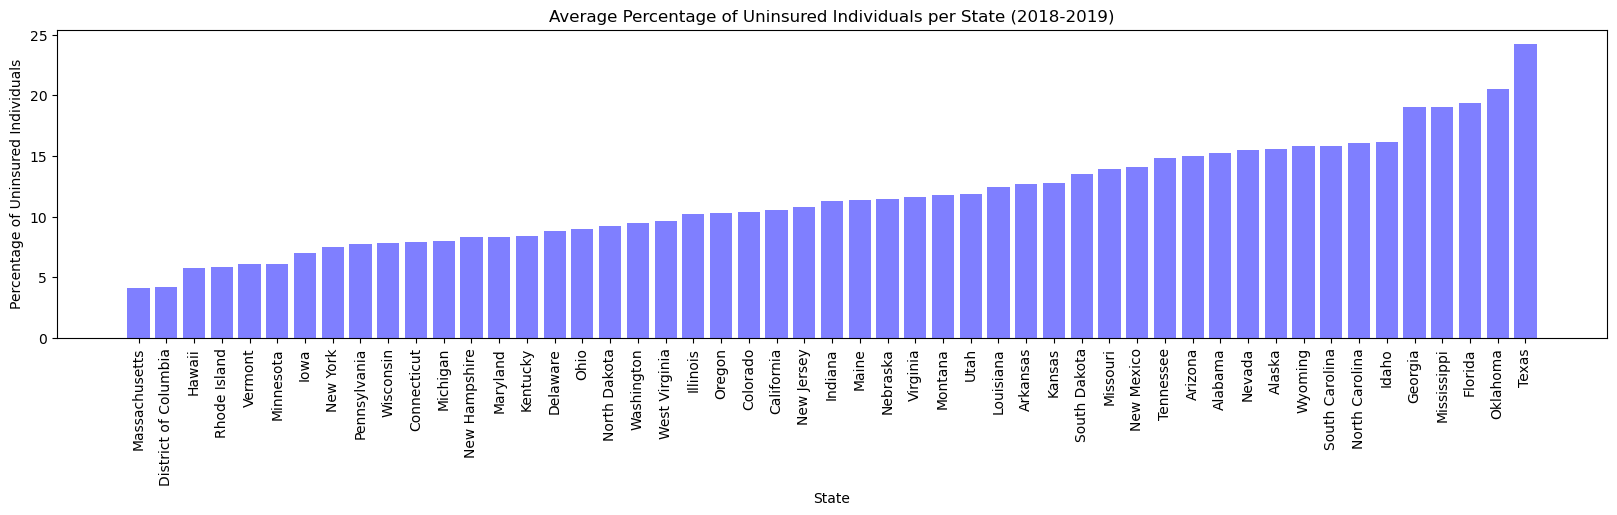

In [99]:
# Bar chart percentage of individuals per State least -> highest
x_axis = np.arange(len(unis_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, unis_sorted["Percentage of Uninsured Adults"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, unis_sorted["State"], rotation="vertical")
plt.title('Average Percentage of Uninsured Individuals per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Percentage of Uninsured Individuals')
plt.show()

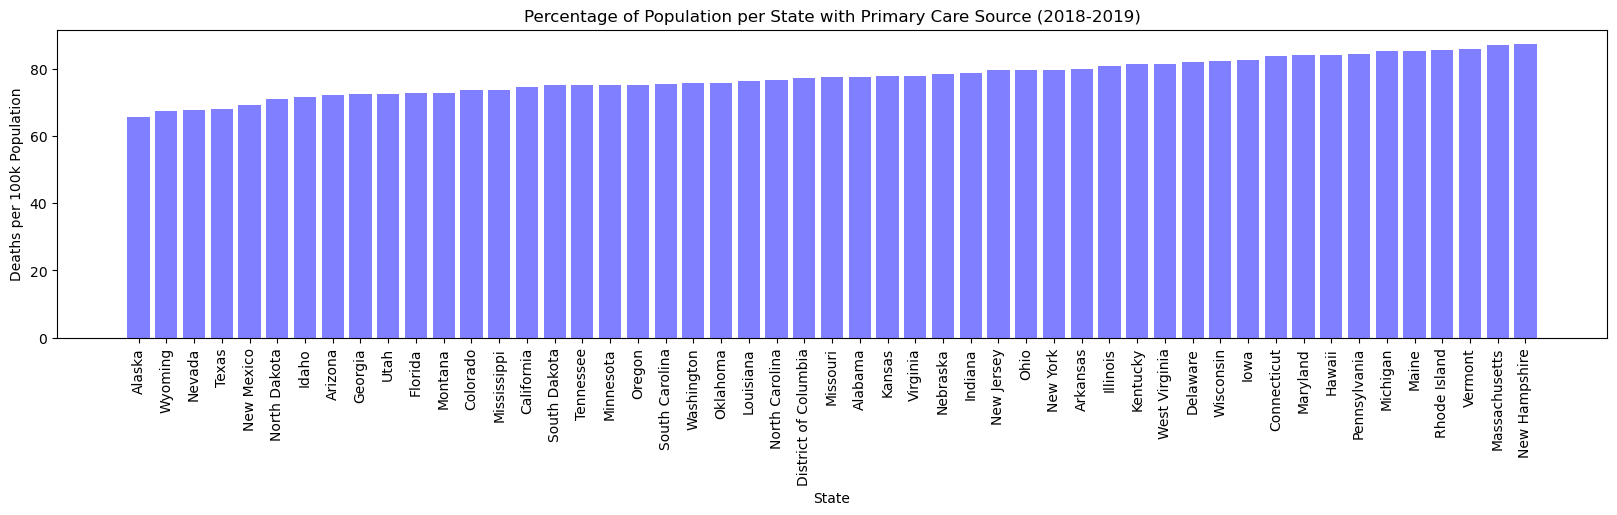

In [127]:
# Need to add bar chart for doc visits
x_axis = np.arange(len(doc_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, doc_sorted["Percentage of Adults visit Reg Doctors"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, doc_sorted["State"], rotation="vertical")
plt.title('Percentage of Population per State with Primary Care Source (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

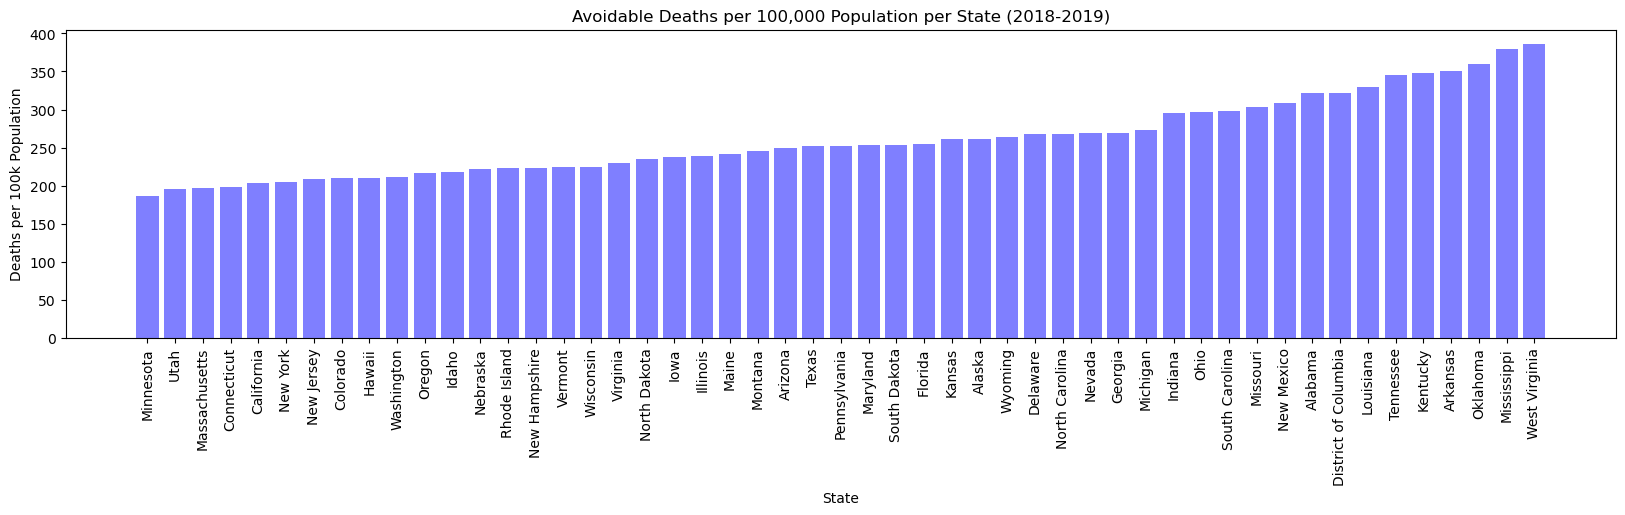

In [101]:
# Bar chart avoidable deaths per State least -> most
x_axis = np.arange(len(avoi_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, avoi_sorted["Avoidable Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, avoi_sorted["State"], rotation="vertical")
plt.title('Avoidable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

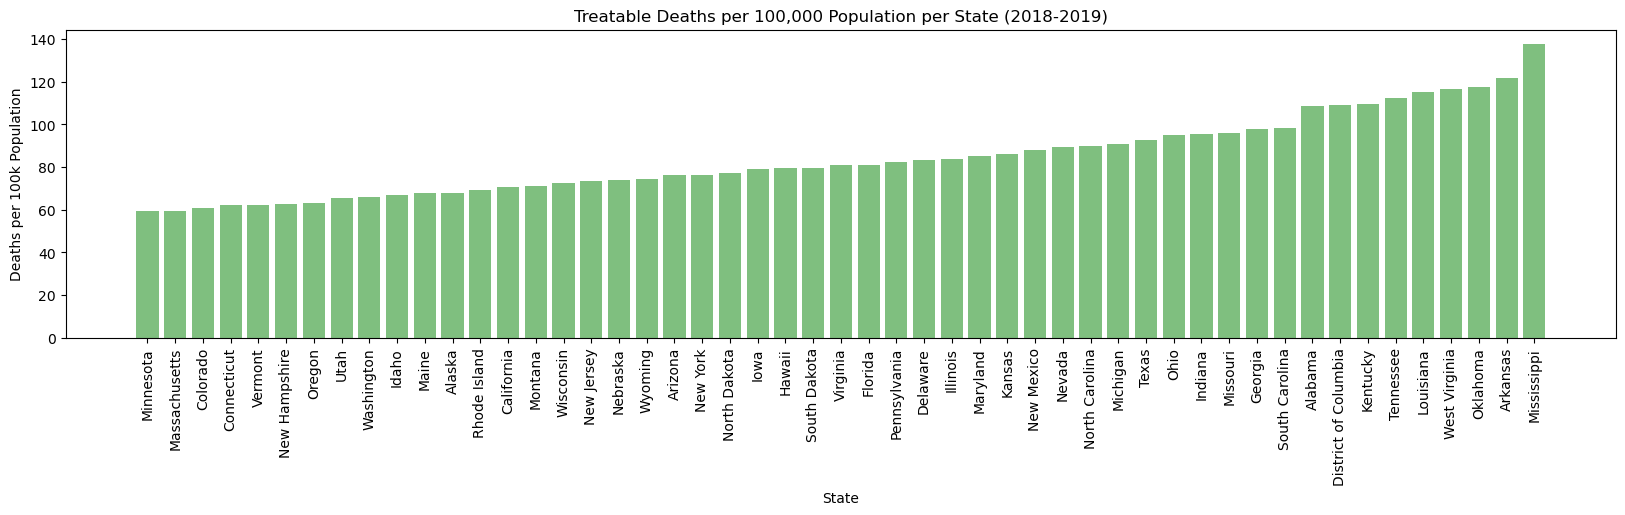

In [103]:
# Bar chart treatable deaths per state sorted
x_axis = np.arange(len(treat_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, treat_sorted["Treatable Deaths per 100k Population"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, treat_sorted["State"], rotation="vertical")
plt.title('Treatable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

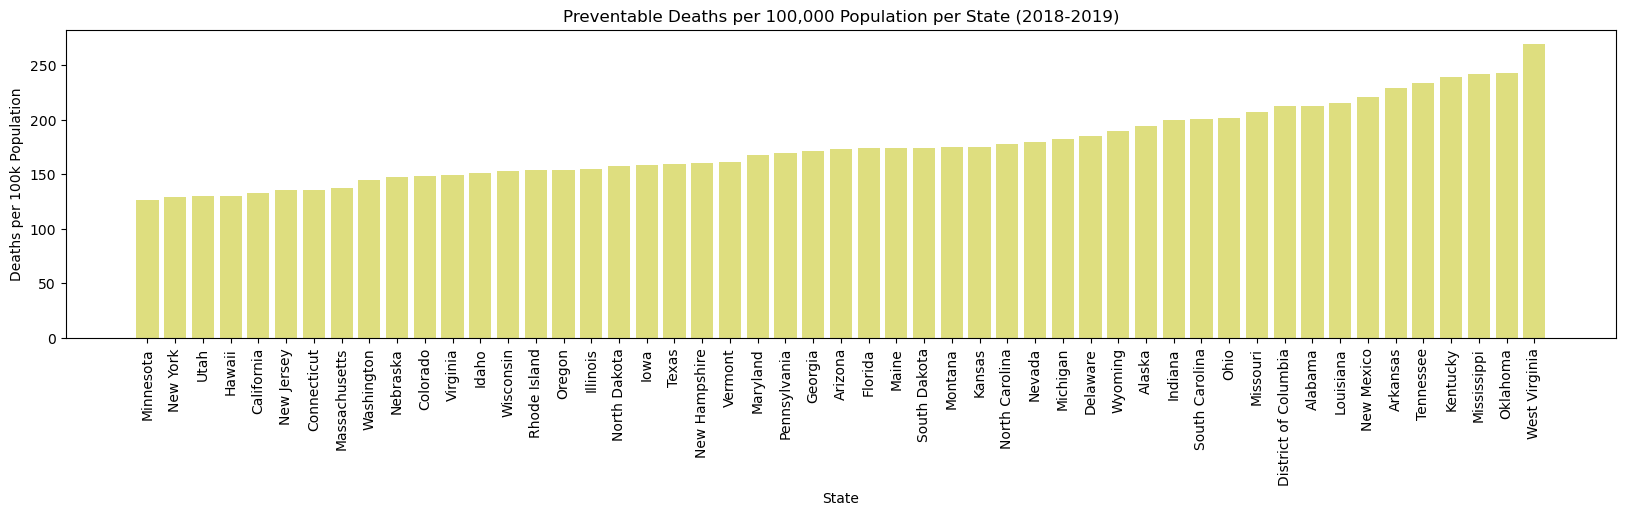

In [104]:
# Bar chart Preventable deaths per state sorted
x_axis = np.arange(len(prev_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, prev_sorted["Preventable Deaths per 100k Population"], color='y', alpha=0.5, align="center")
plt.xticks(tick_locations, prev_sorted["State"], rotation="vertical")
plt.title('Preventable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

In [113]:
# verifying the index to prep for use of iloc
# Reminder: this is a zero index
merged_data.columns

Index(['State', 'Percentage of Uninsured Adults',
       'Percentage of Adults visit Reg Doctors',
       'Avoidable Deaths per 100k Population',
       'Treatable Deaths per 100k Population',
       'Preventable Deaths per 100k Population'],
      dtype='object')

In [114]:
# Easier visual for counting index for use with iloc
merged_data.head(0)

,State,Percentage of Uninsured Adults,Percentage of Adults visit Reg Doctors,Avoidable Deaths per 100k Population,Treatable Deaths per 100k Population,Preventable Deaths per 100k Population


The correlation between both factors is -0.69


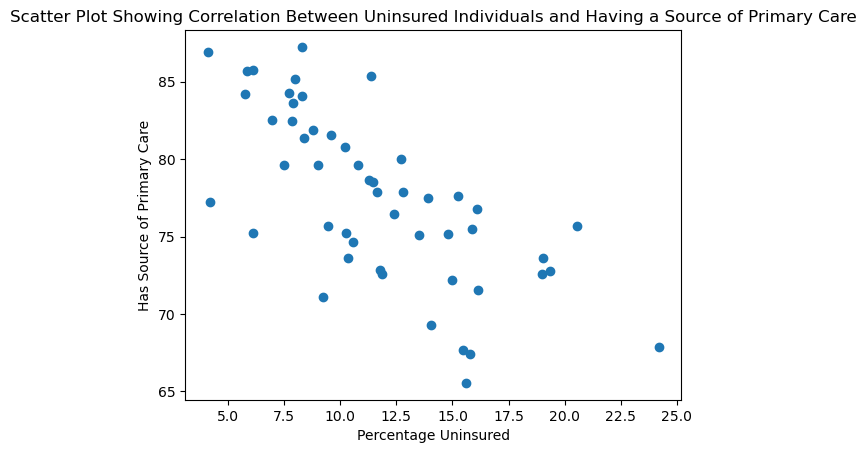

In [122]:
# Correlation between uninsured and has primary care doc
x_uninsured = merged_data.iloc[:,1] 
y_has_doc = merged_data.iloc[:,2] 
correlation = st.pearsonr(x_uninsured,y_has_doc) 
plt.scatter(x_uninsured,y_has_doc) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Has Source of Primary Care')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Having a Source of Primary Care')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

# Results: HIGH negative coorelation
# If uninsured, much less likely to have a source of primary care

The correlation between both factors is -0.12


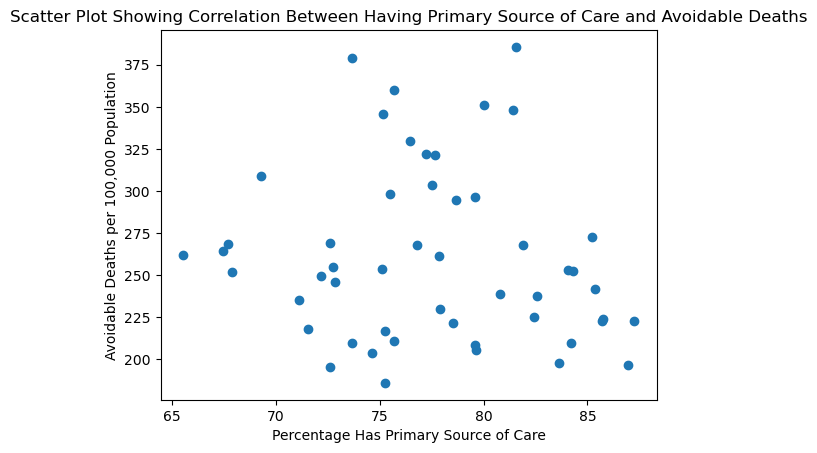

In [124]:
# Correlation between having primary care and avoidable deaths
x_has_doc = merged_data.iloc[:,2] 
y_avoi_deaths = merged_data.iloc[:,3] 
correlation = st.pearsonr(x_has_doc,y_avoi_deaths) 
plt.scatter(x_has_doc,y_avoi_deaths) 
plt.xlabel('Percentage Has Primary Source of Care') 
plt.ylabel('Avoidable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Having Primary Source of Care and Avoidable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is 0.38


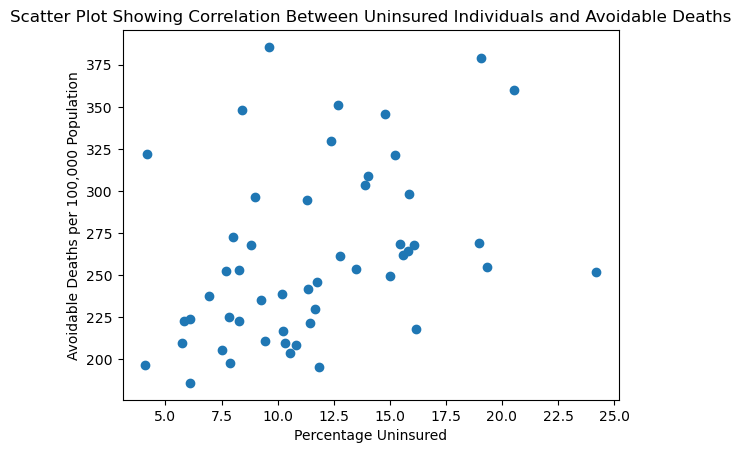

In [106]:
# Correlation between uninsured and avoidable deaths
x_uninsured = merged_data.iloc[:,1] 
y_avoi_deaths = merged_data.iloc[:,3] 
correlation = st.pearsonr(x_uninsured,y_avoi_deaths) 
plt.scatter(x_uninsured,y_avoi_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Avoidable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Avoidable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is -0.09


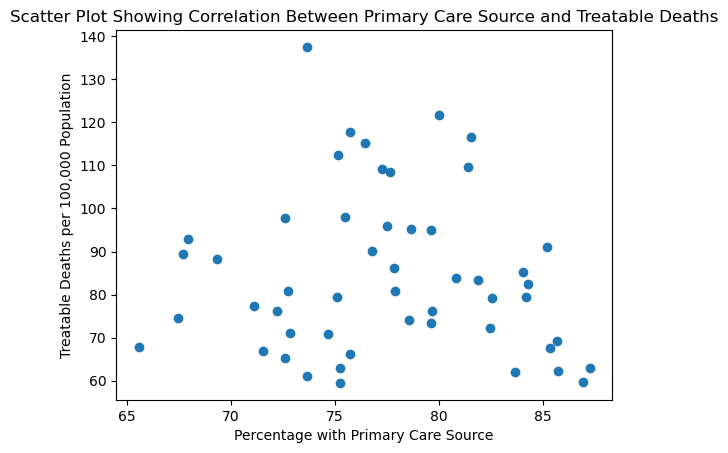

In [125]:
# correlation between having primary care soruce and treatable deaths
x_has_doc = merged_data.iloc[:,2]
y_treat_deaths = merged_data.iloc[:,4] 
correlation = st.pearsonr(x_has_doc,y_treat_deaths) 
plt.scatter(x_has_doc,y_treat_deaths) 
plt.xlabel('Percentage with Primary Care Source') 
plt.ylabel('Treatable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Primary Care Source and Treatable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is 0.39


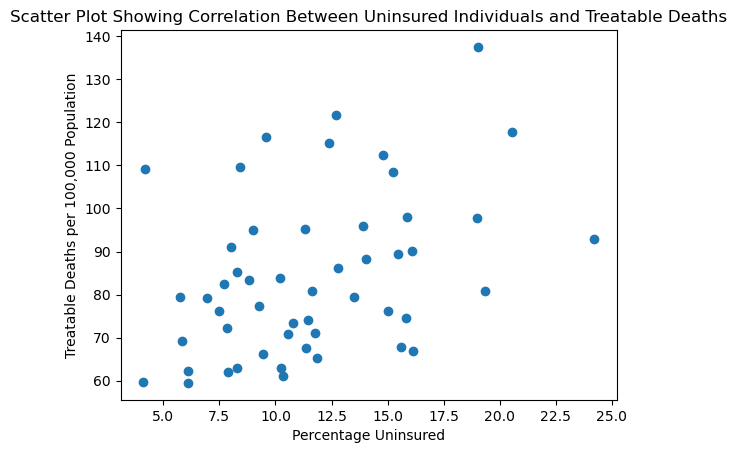

In [123]:
# correlation between percentage uninsured and treatable deaths
# Technically we don't need to specify x_uninsured multiple times
# but keeping it to keep all lines needed to create the visual
x_uninsured = merged_data.iloc[:,1] 
y_treat_deaths = merged_data.iloc[:,4] 
correlation = st.pearsonr(x_uninsured,y_treat_deaths) 
plt.scatter(x_uninsured,y_treat_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Treatable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Treatable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is -0.13


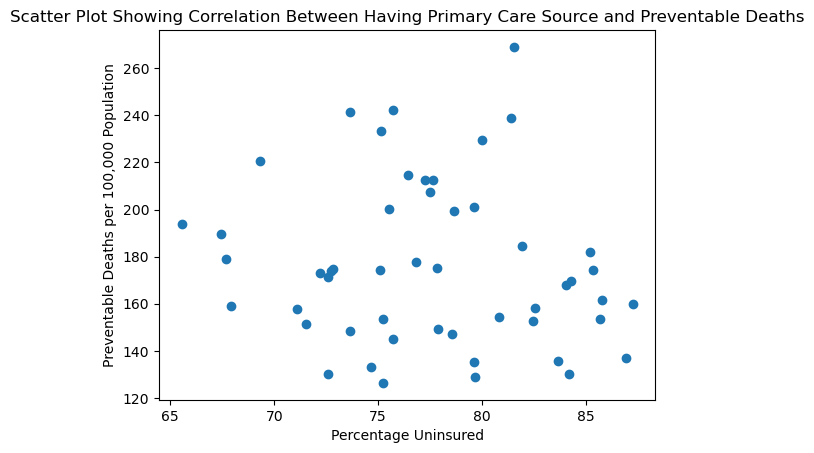

In [126]:
# correlation between having primary care and preventable deaths
x_has_doc = merged_data.iloc[:,2]
y_prev_deaths = merged_data.iloc[:,5] 
correlation = st.pearsonr(x_has_doc,y_prev_deaths) 
plt.scatter(x_has_doc,y_prev_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Preventable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Having Primary Care Source and Preventable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is 0.35


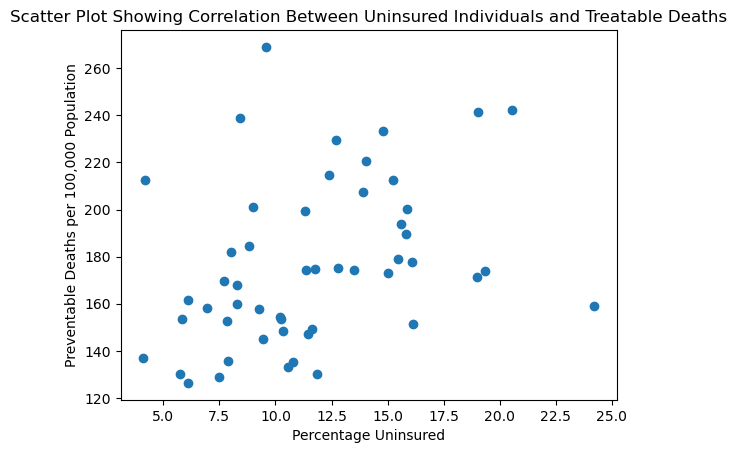

In [118]:
# correlation between uninsured and preventable deaths
x_uninsured = merged_data.iloc[:,1] 
y_prev_deaths = merged_data.iloc[:,5] 
correlation = st.pearsonr(x_uninsured,y_prev_deaths) 
plt.scatter(x_uninsured,y_treat_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Preventable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Preventable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

In [ ]:
# Lastest update pushed
# ELaine - 2/3/2024 - 5:17 pm